In [170]:
#import plotly.express as px
import matplotlib.pyplot as plt
import numpy as np
from spectral import *
from sklearn.preprocessing import scale, normalize

In [171]:
#LOAD DATA

In [172]:
img = open_image("G:/ham_quality_analysis/SPECIM_IQ/data_IQ_samples/2020-07-17_005/results/REFLECTANCE_2020-07-17_005.hdr")

In [173]:
data = img.load()
print("Data: ", data.shape)

Data:  (512, 512, 204)


In [174]:
#PLOT SOME BANDS :)

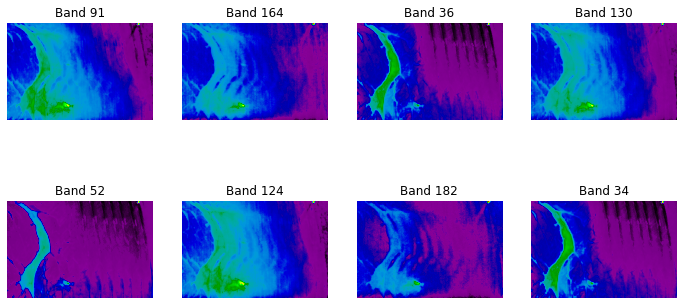

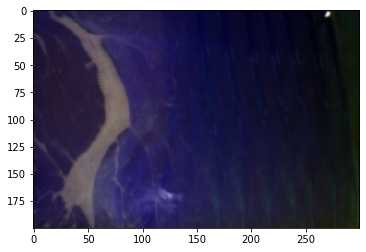

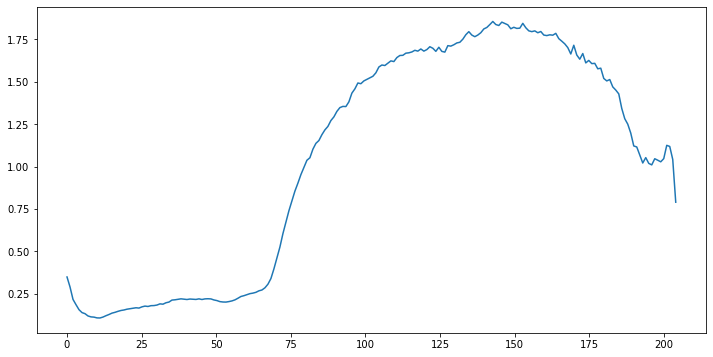

In [175]:
fig = plt.figure(figsize = (12,6))

dat = data[150:350,50:350]

for i in range(1, 1 + 8):
    fig.add_subplot(2,4, i) #grid 2 by 4
    q = np.random.randint(dat.shape[2]) # Choose a random band 
    plt.imshow(dat.read_band(q), cmap='nipy_spectral')
    plt.axis('off')
    plt.title('Band ' + str(q))

imshow(dat, (30, 60, 120))

fig2 = plt.figure(figsize = (12,6))
bands = np.linspace(0,204,204).tolist()
pixel = dat[90,150].tolist()
plt.plot(bands, pixel)
plt.show()

In [176]:
#CONVERT THE DATA INTO CSV

In [179]:
import pandas as pd

def extract_pixels(data):
    q = data.reshape(-1,data.shape[2])
    df = pd.DataFrame(data = q)
    df.columns= [f'band{i+10}' for i in range(1, 1+data.shape[2])]
    df.to_csv('G:/ham_quality_analysis/Dataset.csv')
    return df

region = dat[:,:,10:200]
df = extract_pixels(region)

In [180]:
df.head()

,band11,band12,band13,band14,band15,band16,band17,band18,band19,band20,...,band191,band192,band193,band194,band195,band196,band197,band198,band199,band200
0,0.066372,0.065247,0.070332,0.080935,0.093115,0.105932,0.119760,0.131579,0.141844,0.149411,...,1.211538,1.189516,1.166667,1.184211,1.226852,1.177885,1.198980,1.143617,1.111111,1.104651
1,0.070059,0.072115,0.070332,0.080935,0.093115,0.108581,0.122255,0.136278,0.139628,0.149411,...,1.230769,1.189516,1.145833,1.206140,1.180556,1.153846,1.147959,1.196809,1.138889,1.075581
2,0.070059,0.068681,0.070332,0.077938,0.090293,0.105932,0.119760,0.133929,0.139628,0.145202,...,1.211538,1.209677,1.187500,1.162281,1.180556,1.153846,1.147959,1.143617,1.138889,1.104651
3,0.073746,0.072115,0.070332,0.077938,0.090293,0.108581,0.119760,0.131579,0.139628,0.149411,...,1.211538,1.270161,1.187500,1.162281,1.157407,1.129808,1.147959,1.143617,1.138889,1.133721
4,0.070059,0.075549,0.070332,0.083933,0.095937,0.108581,0.119760,0.126880,0.135195,0.147306,...,1.230769,1.169355,1.145833,1.162281,1.134259,1.153846,1.122449,1.143617,1.083333,1.104651


In [181]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Columns: 190 entries, band11 to band200
dtypes: float32(190)
memory usage: 43.5 MB


In [182]:
df.iloc[:, :-1].describe()

,band11,band12,band13,band14,band15,band16,band17,band18,band19,band20,...,band190,band191,band192,band193,band194,band195,band196,band197,band198,band199
count,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,...,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000
mean,0.119536,0.120128,0.125853,0.137858,0.152137,0.165947,0.178791,0.188877,0.197992,0.206206,...,1.198787,1.172777,1.160928,1.131768,1.128724,1.129601,1.112218,1.123710,1.115524,1.107673
std,0.049298,0.054117,0.063576,0.076991,0.090513,0.101617,0.110522,0.116624,0.121808,0.126052,...,0.135000,0.136154,0.136713,0.134549,0.134115,0.134067,0.130156,0.130064,0.126027,0.122849
min,0.062684,0.058379,0.057545,0.056954,0.056433,0.055614,0.052395,0.051692,0.053191,0.052609,...,0.919118,0.903846,0.887097,0.875000,0.877193,0.856481,0.841346,0.867347,0.877660,0.861111
25%,0.092183,0.092720,0.092711,0.098921,0.104402,0.113877,0.117265,0.122180,0.124113,0.126263,...,1.084559,1.057692,1.048387,1.020833,1.030702,1.018518,1.009615,1.020408,1.010638,1.000000
50%,0.106932,0.106456,0.108696,0.116906,0.126975,0.137712,0.152196,0.166823,0.177305,0.187290,...,1.158088,1.134615,1.129032,1.104167,1.096491,1.087963,1.081731,1.096939,1.090426,1.083333
75%,0.129056,0.127060,0.134271,0.146882,0.160835,0.174788,0.189621,0.202068,0.214982,0.225168,...,1.286765,1.269231,1.250000,1.229167,1.206140,1.226852,1.201923,1.198980,1.196809,1.194444
max,1.073009,1.119505,1.150895,1.193045,1.227427,1.255297,1.274950,1.278196,1.287677,1.319444,...,2.886029,2.903846,2.822581,2.729167,2.719298,2.754630,2.740385,2.602041,2.632979,2.611111


In [126]:
#APPLY PCA

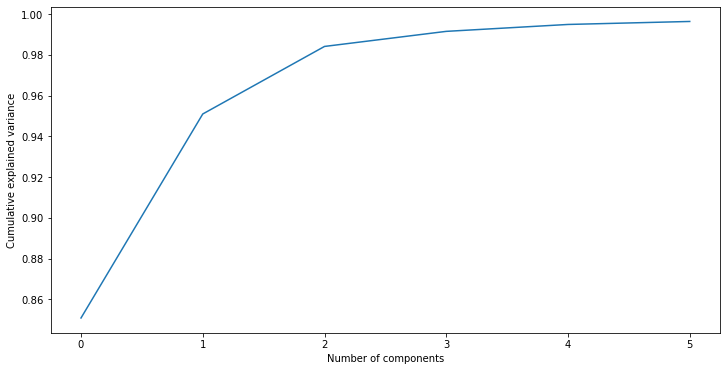

In [185]:
from sklearn.decomposition import PCA

pca = PCA(.995)
principalComponents = pca.fit_transform(df.iloc[:, :-1].values)

ev=pca.explained_variance_ratio_

plt.figure(figsize=(12, 6))
plt.plot(np.cumsum(ev))
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')


plt.show()

In [186]:
X = df.iloc[:, :-1].values
Xn = normalize(X)
#Xs = scale(X)
pca = PCA(n_components = 5)
dt = pca.fit_transform(Xn)
q = pd.DataFrame(data = dt)
q.columns = [f'band-{i}' for i in range(1,6)]

In [187]:
q.head()

,band-1,band-2,band-3,band-4,band-5
0,-0.044903,-0.012593,0.008401,-0.015919,0.003806
1,-0.041320,-0.013377,0.006551,-0.015840,0.003573
2,-0.039723,-0.016698,0.008689,-0.015487,0.005163
3,-0.042345,-0.013848,0.009301,-0.015685,0.004299
4,-0.038119,-0.016876,0.011065,-0.014978,0.005545


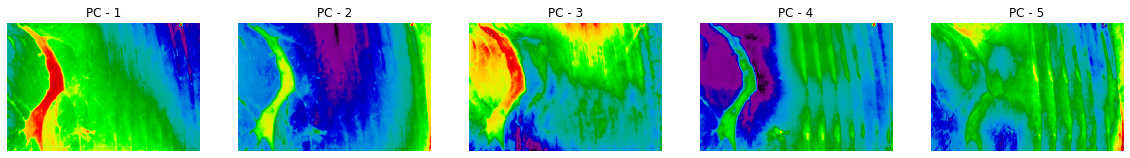

In [193]:
fig = plt.figure(figsize = (20, 10))

for i in range(1, 1+5):
    fig.add_subplot(1,5, i)
    plt.imshow(q.loc[:, f'band-{i}'].values.reshape(200, 300), cmap='nipy_spectral')
    plt.axis('off')
    plt.title(f'PC - {i}')

In [194]:
#VISUALIZE 3D projection

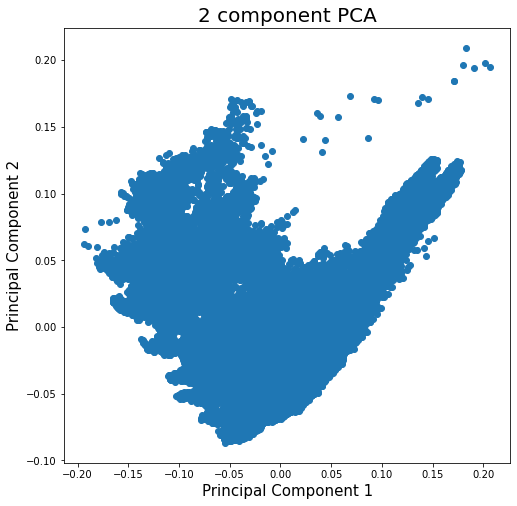

In [199]:
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111)#, projection='3d') 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
#ax.set_zlabel('Principal Component 3', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
x = q.loc[:,'band-1'].values
#print(x.shape)
y = q.loc[:, 'band-2'].values
#z = q.loc[:, 'PC-3'].values
ax.scatter(x,y)#,z)

In [196]:
pca.explained_variance_ratio_

array([0.6269602 , 0.3150976 , 0.0250725 , 0.01250988, 0.00526406],
      dtype=float32)